In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

Text(0.5, 0, 'Species')

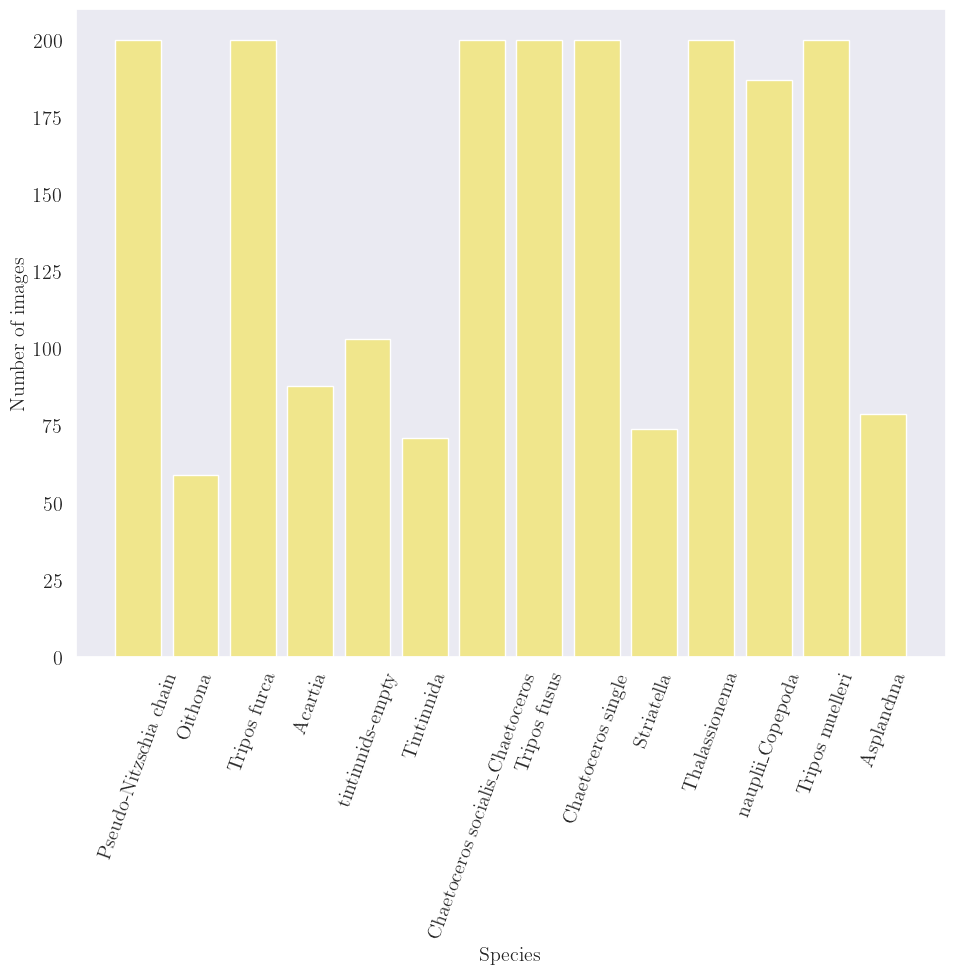

In [24]:
#data = pd.read_csv("../data/features_padded_plancton")

import matplotlib.pyplot as plt
import seaborn as sns

def set_plt_params(remove_grid=False):
    """Set parameters and use seaborn theme to plot."""
    sns.set_theme()
    if remove_grid:
        sns.set_style("whitegrid", {"axes.grid": False})
    params = {
        "font.family": "Serif",
        "font.serif": "Roman", 
        "text.usetex": True,
        "axes.titlesize": "large",
        "axes.labelsize": "large",
        "xtick.labelsize": "large",
        "ytick.labelsize": "large",
        "legend.fontsize": "medium", 
        "savefig.dpi": 300, 
        "axes.grid" : False
    }
    plt.rcParams.update(params)
set_plt_params()


main_dir = "../../data/features_padded_plancton/"
species = os.listdir(main_dir)

amount = []
for specie in species: 
    no = len([image for image in os.listdir(main_dir+specie) if not image.startswith(".")])
    amount.append(no)
    
#amount
plt.figure(figsize=(10, 8))
plt.bar(species, amount, color = "khaki")
plt.xticks(rotation=70)
plt.ylabel("Number of images")
plt.xlabel("Species")
#plt.savefig("figs/label_distribution.pdf", bbox_inches = "tight")


In [4]:
indexs = species
df = pd.DataFrame(columns = ["feature_" + str(i) for i in range(384)], index=indexs)



In [5]:
main_dir = "../../data/features_padded_plancton/"
species = os.listdir(main_dir)

d_dict = {}

for specie in species: 
    imfls = [image for image in os.listdir(main_dir+specie) if not image.startswith(".")]
    for im in imfls:
        d_dict[(specie, im)] = np.loadtxt(main_dir+specie + "/" + im)

features = pd.DataFrame(d_dict).T
#features.to_csv('../../data/dinov2_features.csv')

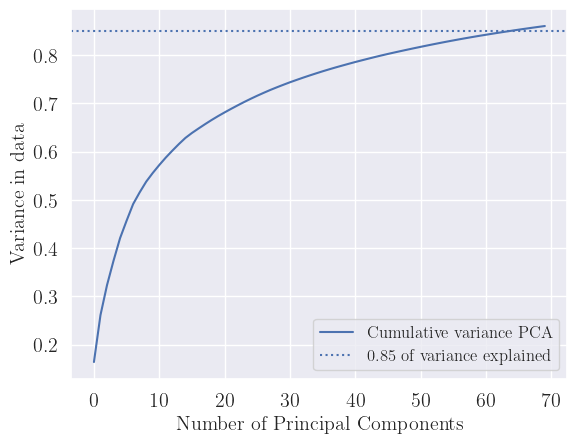

[0.16387565 0.26108471 0.32314604 0.37388736 0.42063625 0.45680872
 0.49124693 0.51548471 0.53767222 0.55563742 0.57210786 0.5876179
 0.60186951 0.61555678 0.62827585 0.638542   0.64773396 0.65669851
 0.66531921 0.67346849 0.68113744 0.68857709 0.69576446 0.70273751
 0.70939332 0.71577058 0.72183036 0.72770539 0.73317094 0.73844789
 0.74358699 0.74837997 0.75309345 0.75762374 0.76201933 0.76630958
 0.77041307 0.77436941 0.77815944 0.78190858 0.78557174 0.78906714
 0.79250829 0.79589288 0.79917006 0.80232493 0.80536477 0.80834407
 0.81127987 0.81416762 0.81699049 0.81977245 0.82250271 0.82516488
 0.82778053 0.83030349 0.83280499 0.83520883 0.83755089 0.83985802
 0.84205594 0.84425024 0.84637504 0.84847966 0.85053208 0.85256785
 0.85450455 0.85642118 0.85829653 0.86010625]


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 70)

pca.fit(features)

plt.plot(np.cumsum(pca.explained_variance_ratio_), label = "Cumulative variance PCA")
plt.axhline(0.85, ls = ":", label = "0.85 of variance explained")
plt.grid(True)
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance in data")
plt.legend()
#plt.savefig("figs/cumsum_pca.pdf", bbox_inches = "tight")
plt.show()

print(np.cumsum(pca.explained_variance_ratio_))

In [33]:
import umap
n = 70
standard = StandardScaler().fit_transform(features) 
pca_fit = pca.fit_transform(standard)

#umap
reducer = umap.UMAP(random_state=42) # fixed random state gives reproducibility
embedding = reducer.fit_transform(pca_fit) 

# putting all pca into pca df and umap df
pca_df = pd.DataFrame(pca_fit, index = features.index, columns = ["pca_"+str(i) for i in range(n)])
umap_df = pd.DataFrame(embedding, index = features.index, columns = ["embedding_0", "embedding_1"])

multiindex_umap = umap_df

pca_df

/Users/ellen-beatetysvaer/opt/anaconda3/envs/pthree-dev/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


pca_0     pca_1     pca_2  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   12.223679 -3.609307  1.047032   
                       18_48_01_603240_0.txt   14.450505 -2.740759 -4.360431   
                       16_14_20_282179_0.txt   12.429804  0.061900 -0.020333   
                       12_47_38_412989_10.txt   9.590462 -1.539973  2.119135   
                       11_34_18_433102_1.txt    1.282143 -0.476244  0.385857   
...                                                  ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   -7.051107  1.405521  3.973012   
                       14_12_09_513048_2.txt   -4.750661  3.092971  3.855723   
                       23_02_55_885299_1.txt   -8.363859  1.980346  3.887527   
                       17_04_17_138640_1.txt   -3.361623 -1.803100  3.293156   
                       13_50_34_650304_0.txt   -5.092860  0.666015  3.600836   

                                                  pca_3     pca_4     pca_5  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   1.063282 -0.184626 -2.820787   
                       18_48_01_603240_0.txt  -0.653177 -3.584078 -7.312568   
                       16_14_20_282179_0.txt   1.302186 -0.247375 -0.402320   
                       12_47_38_412989_10.txt  1.053270  2.053150 -3.208099   
                       11_34_18_433102_1.txt  -4.978654  7.877700 -6.574208   
...                                                 ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   3.903081 -2.438517 -1.038009   
                       14_12_09_513048_2.txt   9.497845 -2.451064 -5.024807   
                       23_02_55_885299_1.txt   3.251257 -0.539067  1.923415   
                       17_04_17_138640_1.txt   2.296943 -1.273595  3.033141   
                       13_50_34_650304_0.txt   7.858270 -2.241583 -2.764541   

                                                  pca_6     pca_7     pca_8  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   1.188225  2.947854 -1.793434   
                       18_48_01_603240_0.txt  -5.057800 -0.163793  1.077356   
                       16_14_20_282179_0.txt   1.418475  0.399443 -4.266468   
                       12_47_38_412989_10.txt -1.269136  4.316209 -2.071674   
                       11_34_18_433102_1.txt   1.433544  1.821155 -0.933689   
...                                                 ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   2.227231  0.799047  2.407214   
                       14_12_09_513048_2.txt  -1.872135  0.211100  6.187151   
                       23_02_55_885299_1.txt  -0.980111 -1.598403  2.118126   
                       17_04_17_138640_1.txt  -2.575179  1.307426  2.440447   
                       13_50_34_650304_0.txt   1.599355 -0.924855  7.632562   

                                                  pca_9  ...    pca_60  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt  -2.041132  ...  1.700848   
                       18_48_01_603240_0.txt  -0.697310  ...  1.414656   
                       16_14_20_282179_0.txt  -1.802496  ... -0.346759   
                       12_47_38_412989_10.txt -2.606786  ...  0.704332   
                       11_34_18_433102_1.txt  -0.116799  ... -0.018742   
...                                                 ...  ...       ...   
Asplanchna             17_13_45_429581_1.txt  -2.173951  ... -0.760227   
                       14_12_09_513048_2.txt   0.033104  ...  0.134462   
                       23_02_55_885299_1.txt  -2.171876  ...  0.358643   
                       17_04_17_138640_1.txt  -3.199996  ... -0.662777   
                       13_50_34_650304_0.txt   3.209316  ...  1.080133   

                                                 pca_61    pca_62    pca_63  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt  -0.792482 -0.437740 -1.705245   
                       18_48_01_603240_0.txt  -0.693771  1.854040  0.170883   
                       16_14_20_282179_0.txt   0.566143 -0.782443 

In [18]:

pca_df = pca_df.reset_index()
map = {"level_0":"species", "level_1": "filename"}
pca_df = pca_df.rename(columns = {"level_0" : "species", "level_1" : "filename"})


pca_df

,index,species,filename,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,...,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69
0,0,Pseudo-Nitzschia chain,11_31_24_300112_1.txt,12.223679,-3.609306,1.047031,1.063281,-0.184629,-2.820779,1.188222,...,0.501201,1.818694,-0.638871,-1.008650,0.293527,-0.153670,2.372399,1.055846,-1.278706,0.737447
1,1,Pseudo-Nitzschia chain,18_48_01_603240_0.txt,14.450506,-2.740759,-4.360431,-0.653177,-3.584077,-7.312570,-5.057803,...,1.004553,1.191908,1.875582,-0.282164,-0.064453,0.679289,-1.030954,0.932312,-1.231025,0.974339
2,2,Pseudo-Nitzschia chain,16_14_20_282179_0.txt,12.429804,0.061901,-0.020333,1.302185,-0.247374,-0.402313,1.418469,...,-0.243258,-0.355131,-1.084593,0.222731,0.263219,2.053125,1.819555,2.460851,-0.589887,0.692466
3,3,Pseudo-Nitzschia chain,12_47_38_412989_10.txt,9.590462,-1.539974,2.119135,1.053271,2.053151,-3.208095,-1.269144,...,0.381555,1.156393,0.842821,-0.219220,0.181112,-1.193154,1.414302,-0.985463,0.069855,0.502074
4,4,Pseudo-Nitzschia chain,11_34_18_433102_1.txt,1.282143,-0.476244,0.385857,-4.978654,7.877699,-6.574208,1.433546,...,0.200435,-0.450926,-0.289787,-0.115701,0.413912,-0.685988,0.487415,0.288506,1.136049,-0.272829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,2056,Asplanchna,17_13_45_429581_1.txt,-7.051107,1.405521,3.973012,3.903084,-2.438517,-1.038010,2.227241,...,-0.566612,-0.089015,-0.346478,-1.019321,-0.524588,1.187097,0.269571,-0.349506,1.390557,-0.378296
2057,2057,Asplanchna,14_12_09_513048_2.txt,-4.750661,3.092971,3.855723,9.497845,-2.451067,-5.024804,-1.872130,...,0.969998,-0.819120,-0.075228,0.834332,0.580243,-1.659467,0.524225,0.511727,-0.295414,-0.117532
2058,2058,Asplanchna,23_02_55_885299_1.txt,-8.363859,1.980345,3.887527,3.251259,-0.539064,1.923407,-0.980119,...,0.081805,0.552890,1.033895,1.916004,0.807699,1.437172,-0.511963,-0.331444,-0.336609,-0.118602
2059,2059,Asplanchna,17_04_17_138640_1.txt,-3.361623,-1.803100,3.293155,2.296942,-1.273597,3.033144,-2.575191,...,-0.696207,1.070180,-0.633147,-0.041373,0.915336,-0.099123,0.010600,-0.421644,0.428229,-1.656836


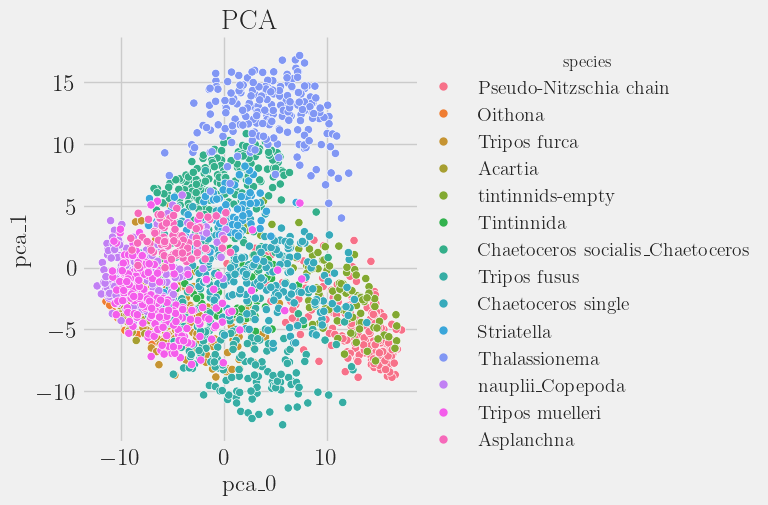

In [19]:
sns.relplot(x = "pca_0", y = "pca_1", 
            data = pca_df, 
            kind = "scatter", 
            hue = "species"
            )
plt.title(f"PCA")
#plt.savefig("figs/pca0_pca1.pdf", bbox_inches = "tight")
plt.show()


In [20]:
umap_df = umap_df.reset_index()
umap_df.columns = ['species', 'file_name', 'embedding_0', 'embedding_1']

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

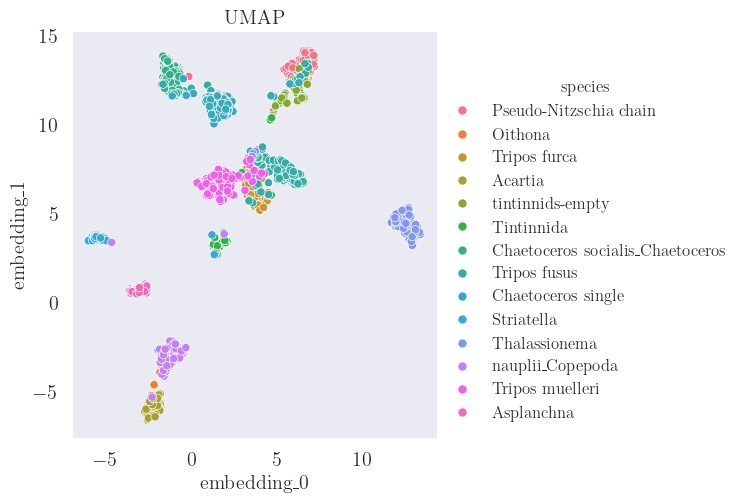

In [ ]:
sns.relplot(x = "embedding_0", y = "embedding_1", 
            data = umap_df, 
            kind = "scatter", 
            hue = "species"
            )
plt.title(f"UMAP")
#plt.savefig("figs/umap_on_70pca.pdf", bbox_inches = "tight")
plt.show()

In [ ]:

data = umap_df[["embedding_0", "embedding_1"]]
data

,embedding_0,embedding_1
0,6.813079,12.725692
1,7.109539,13.232157
2,6.781351,12.605517
3,6.801156,12.641570
4,4.169883,8.685773
...,...,...
2056,-2.725646,0.633787
2057,-3.029210,0.842674
2058,-3.189035,0.501768
2059,-3.039474,0.572289


recommended k = 11


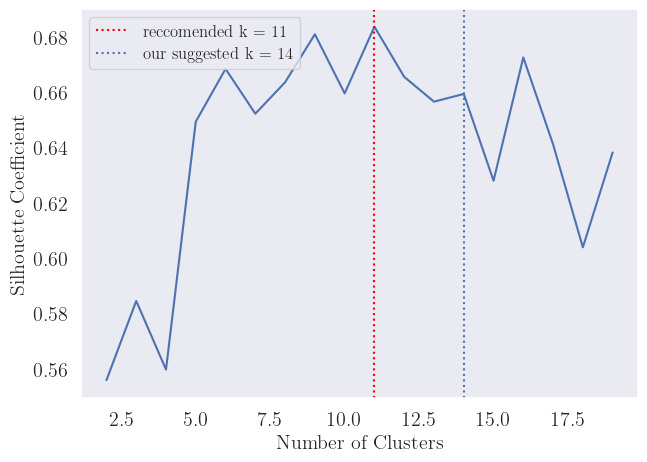

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

test_range = range(2, 20)

silhouette_coefficients = []
# starting at two clusters
for k_s in test_range:
    kmeans = KMeans(n_clusters=k_s, **kmeans_kwargs)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(test_range, silhouette_coefficients)
#plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")


global_max = max(silhouette_coefficients)
sil_k = silhouette_coefficients.index(global_max) + 2
print(f"recommended k = {sil_k}")
plt.axvline(sil_k, ls = ":", c = "red", label = f"reccomended k = {sil_k}")
plt.axvline(14, ls = ":", label = f"our suggested k = {14}")
plt.legend()
plt.savefig("figs/kmean_sil.pdf", bbox_inches = "tight")
plt.show()

recommended k = 6


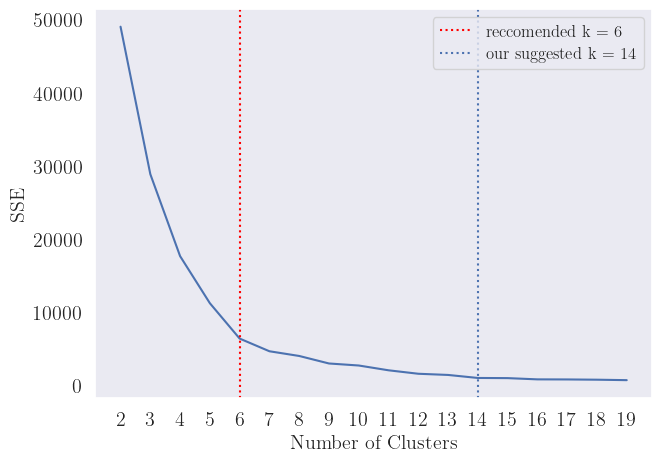

In [31]:
# we want to minimize sse
from kneed import KneeLocator

sse = []
for k in test_range:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(test_range, sse)
plt.xticks(test_range)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")


# with kneed to find elbow:
kl = KneeLocator(
    test_range, 
    sse, 
    curve="convex", 
    direction="decreasing")

k = kl.elbow
kmeans_k = k

print(f"recommended k = {k}")
plt.axvline(k, ls = ":", c = "red", label = f"reccomended k = {k}")
plt.axvline(14, ls = ":", label = f"our suggested k = {14}")
plt.legend()
plt.show()



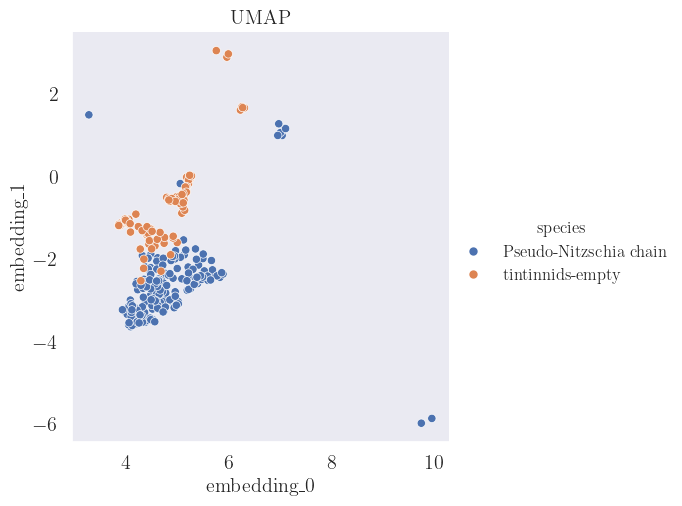

In [47]:
empty = 'tintinnids-empty'
pn = 'Pseudo-Nitzschia chain'

psn_te = multiindex_umap.loc[['Pseudo-Nitzschia chain', 'tintinnids-empty']]
data = psn_te.reset_index()
data.columns = ["species", "filename", "embedding_0", "embedding_1"]

sns.relplot(x = "embedding_0", y = "embedding_1", 
    data = data, 
    kind = "scatter", 
    hue = "species"
    )
plt.title(f"UMAP")
#plt.savefig("figs/umap_on_70pca.pdf", bbox_inches = "tight")
plt.show()

/var/folders/dn/_b68jxwj3hsdgc2lt_2sllc80000gn/T/ipykernel_63882/1695154090.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.relplot(x = "embedding_0", y = "embedding_1",


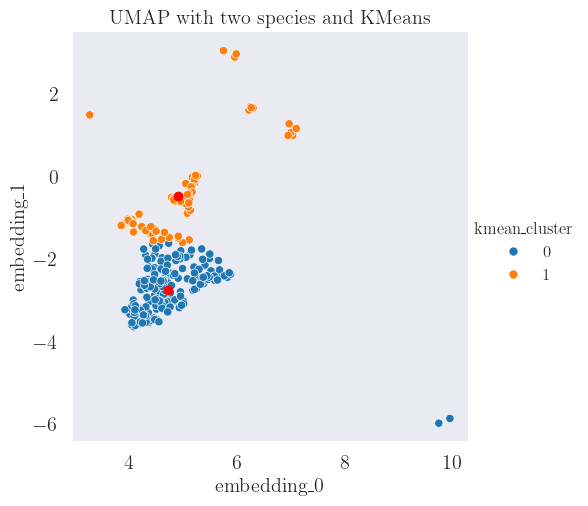

embedding_0  embedding_1  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt      4.366633    -2.181034   
                       18_48_01_603240_0.txt      4.955801    -3.106816   
                       16_14_20_282179_0.txt      4.313819    -1.910192   
                       12_47_38_412989_10.txt     4.622744    -2.109728   
                       11_34_18_433102_1.txt      7.029866     1.000770   
...                                                    ...          ...   
tintinnids-empty       12_48_50_690866_13.txt     3.856364    -1.181535   
                       13_25_23_861739_0.txt      3.987739    -1.052299   
                       14_14_07_137626_7.txt      4.273733    -1.751638   
                       15_27_48_331752_11.txt     6.263349     1.676690   
                       14_56_27_879548_1.txt      4.077140    -1.135258   

                                               kmean_cluster  
Pseudo-Nitzschia chain 11_31_24_300112_1.txt               0  
                       18_48_01_603240_0.txt               0  
                       16_14_20_282179_0.txt               0  
                       12_47_38_412989_10.txt              0  
                       11_34_18_433102_1.txt               1  
...                                                      ...  
tintinnids-empty       12_48_50_690866_13.txt              1  
                       13_25_23_861739_0.txt               1  
                       14_14_07_137626_7.txt               0  
                       15_27_48_331752_11.txt              1  
                       14_56_27_879548_1.txt               1  

[303 rows x 3 columns]

In [54]:
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(psn_te)
psn_te['kmean_cluster'] = kmeans.labels_

custom_palette = sns.color_palette("tab10", k)
sns.relplot(x = "embedding_0", y = "embedding_1", 
            data = psn_te, 
            kind="scatter", 
            palette = custom_palette,
            hue = 'kmean_cluster',
            )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.title(f"UMAP with two species and KMeans")
plt.show()
psn_te


In [55]:
psn_te

embedding_0  embedding_1  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt      4.366633    -2.181034   
                       18_48_01_603240_0.txt      4.955801    -3.106816   
                       16_14_20_282179_0.txt      4.313819    -1.910192   
                       12_47_38_412989_10.txt     4.622744    -2.109728   
                       11_34_18_433102_1.txt      7.029866     1.000770   
...                                                    ...          ...   
tintinnids-empty       12_48_50_690866_13.txt     3.856364    -1.181535   
                       13_25_23_861739_0.txt      3.987739    -1.052299   
                       14_14_07_137626_7.txt      4.273733    -1.751638   
                       15_27_48_331752_11.txt     6.263349     1.676690   
                       14_56_27_879548_1.txt      4.077140    -1.135258   

                                               kmean_cluster  
Pseudo-Nitzschia chain 11_31_24_300112_1.txt               0  
                       18_48_01_603240_0.txt               0  
                       16_14_20_282179_0.txt               0  
                       12_47_38_412989_10.txt              0  
                       11_34_18_433102_1.txt               1  
...                                                      ...  
tintinnids-empty       12_48_50_690866_13.txt              1  
                       13_25_23_861739_0.txt               1  
                       14_14_07_137626_7.txt               0  
                       15_27_48_331752_11.txt              1  
                       14_56_27_879548_1.txt               1  

[303 rows x 3 columns]

File not found


In [ ]:
directory = '../../data/padded_plancton/' + pn + "/"
misclusters = psn_te.loc[pn].query('kmean_cluster == 1')

In [113]:
def random_example_from_cluster(df, cluster, directory, cols = 10, cluster_colname = 'kmean_cluster', filename_colname = 'filename'):
    """
    made 16.07.2024, adapted 27.11.2024
    author: ellenbet
    """
    count = 0
    selected_data = df
    rand_index = random.sample(range(len(selected_data)), cols)
    print(rand_index)
    for i in rand_index:
        jpg = selected_data.index[i].replace('txt', 'jpg')
        img = Image.open(directory + "/" + jpg)
        draw = ImageDraw.Draw(img)
        jpg_txt = f"species: {directory.split("/")[-2]}\n" + jpg + "\ncluster: " + str(cluster) 
        draw.text((10, 10), jpg_txt, fill = 'black')
        if count == 0: 
            print("ATTENTION HEAD CHECK ON: ", jpg, f"CLUSTER {cluster}")
            picture_chain = Image.new('RGB', (img.width * cols+count*cols, img.height))
            picture_chain.paste(img, (0, 0))
        else:
            picture_chain.paste(img, (count+img.width*count, 0))
        count += 1
    return picture_chain

[6, 3, 0, 5, 1]
ATTENTION HEAD CHECK ON:  17_23_12_748381_3.jpg CLUSTER 1


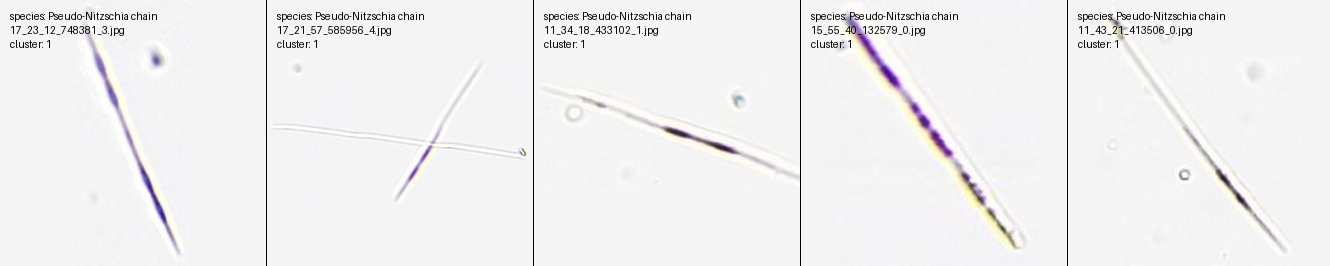

In [114]:
directory = '../../data/padded_plancton/' + pn + "/"
misclusters = psn_te.loc[pn].query('kmean_cluster == 1')

random_example_from_cluster(
    df = misclusters,
    cluster = 1,
    cols = 5,
    directory = directory
)

[7, 2, 9, 6, 1]
ATTENTION HEAD CHECK ON:  10_36_57_545050_1.jpg CLUSTER 0


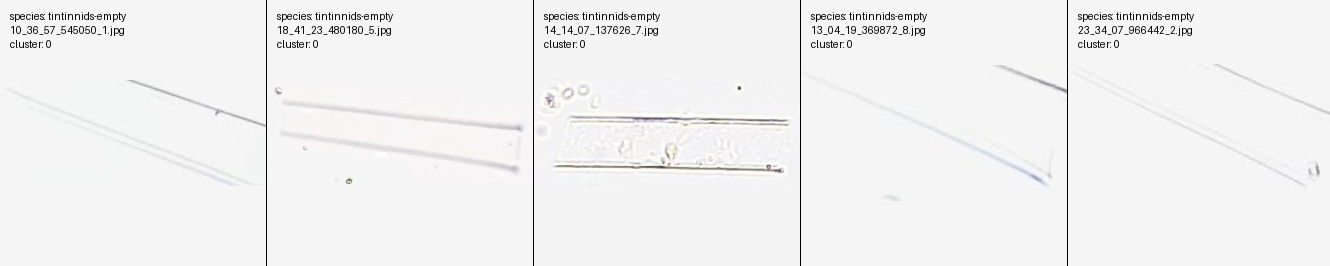

In [115]:
directory = '../../data/padded_plancton/' + empty + "/"
misclusters = psn_te.loc[empty].query('kmean_cluster == 0')

random_example_from_cluster(
    df = misclusters,
    cluster = 0,
    cols = 5,
    directory = directory
)